# Tarea 6: Agustin Ibarra S

Encuentre una aproximación numérica para  (31)1/3  usando el método de bisección. Grafique el tiempo requerido para ese cálculo en función del error relativo. Escoja errores relativos muy pequeños para que el computador tarde un tiempo moderado en el cálculo.

-------------------------------------------------------------------------------------------------------------------------------

## Función

In [19]:
import numpy as np
import matplotlib.pyplot as plt

Primero que todo definiremos una función, tal que uno de los ceros de esta sea el valor que buscamos, para así poder aproximarnos al valor numérico. Por lo que colocamos $ f(x)=-x^3+31 $

In [95]:
def fun(x):
    return -x**3  + 31

Text(0.5, 1.0, 'Funcion f(x)')

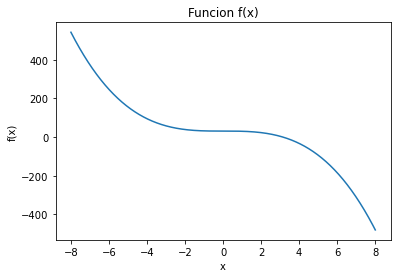

In [136]:
x = np.linspace(-8, 8, 1000)
plt.plot(x, fun(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Funcion f(x)')

Como se ve el gráfico, si se hace un poco de álgebra para buscar los 0 de la función, tendremos que en el rango de 0 a 7, la función cortara al eje x en la raíz cúbica de 31. Para obtener el valor de esta, usaremos el método de bisección, que nos entregara un valor numérico, dependiendo del error que le demos. Se irá variando este último valor, para así conocer como varía el número.

-------------------------------------------------------------------------------------------------------------------------------

In [125]:
def biseccion(f, a, b, epsilon, N=1000000):
    '''
    Funcion biseccion que tomara una funcion, dos valores del dominio [a,b]
    el error esperado en la medidicion y el numero de mediciones que se hara.
    
    biseccion(funcion, a, b, error, N)
    
    Condiciones importantes:
    
    f(a) < 0
    f(b) > 0
    
    -------------------------------------------------------------------------
    Esta funcion tiene con objetivo encontrar la raiz de la funcion en rango 
    [a,b].
    '''
    for i in range(N):
        p = a + (b - a)/2 #Condicion de la biseccion 
        if abs(f(p)) < epsilon: #Aca aplicamos el error que esperamos. 
            return p
       
        if f(p)*f(a) > 0: #Esta condicion es la que ayuda a seguir con la biseccion. 
                a = p
        else:
                b = p 
    if resultado == "F":
        print("No se encontró el cero después de", N, "iteraciones.")
        return "F" #Regresamos el ultimo valor que adquirimos. 

In [112]:
biseccion(fun, 0, 7, 0.1) #Con un error del 0.1.

3.14453125

In [103]:
biseccion(fun, 0, 7, 0.01) #Error de 0.01.

3.14111328125

In [104]:
biseccion(fun, 0, 7, 0.001) #Error 0.001.

3.1413803100585938

In [105]:
biseccion(fun, 0, 7, 0.0001) #Error 0.0001.

3.1413803100585938

In [124]:
biseccion(fun, 0, 7, 10**-13) #Error extremadamente pequeño. 

3.141380652391393

De estos resultados podemos concluir que el valor del número irracional $\sqrt[3]{31}$ con un error suficientemente pequeño es de aproximadamente $ 3.141380652391393 $.

-------------------------------------------------------------------------------------------------------------------------------

## Grafico

Ahora con nuestro resultado numérico, vimos que para cada error teníamos un valor distinto, aun así mientras el error es más pequeño este proceso se vuelve cada vez más costoso para el computador, teniendo un tiempo de ejecución mayor que para el error más grande. Veamos como cambia el tiempo de ejecución respecto a nuestro error relativo impuesto por los epsilon. Para realizar este código lo que realizaremos es fijar varios epsilon, para así ir calculando el tiempo para 1000 intentos de calcular el tiempo. Con este promedio podemos conocer un estimado de cuanto se demora el computador en realizar el proceso (Lo hice de esta manera porque el computador se demoraba muy poco con un solo intento, por lo que calcule varias veces para obtener un valor significativo en la muestra).

Text(0.5, 1.0, 'Log(Error) v/s Log(Tiempo)')

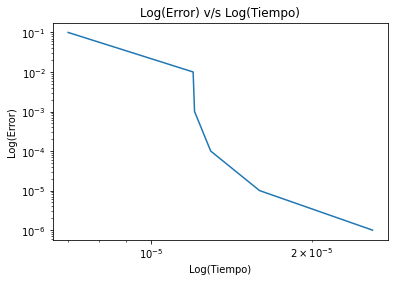

In [134]:
import time #Importamos time para el calculo del tiempo. 
 
error_t = [] #Realizamos listas para poder graficar los errores y los tiempos. 
tiempo = []

for epsilon in [10**-1, 10**-2, 10**-3, 10**-4, 10**-5, 10**-6]: #Errores disminuyendo en factor de 10.
    inicial = time.time() #Inicio del tiempo para calcular por cada vez que vuelve el ciclo.

    for m in range(1000):
        resultado = biseccion(fun, 1.5, 5, epsilon)
     
    tiempo.append(time.time()-inicial) #Calculo del tiempo recorrido por ciclo añadiendolo en una lista. 
    error_t.append(epsilon) #Añadir los valores de los epsilon en la lista error_t,
    
    
plt.loglog(np.array(tiempo)/1000, error_t) #Dividi el valor en 1000 para tener el tiempo que seria en uno solo.
plt.xlabel('Log(Tiempo)')
plt.ylabel('Log(Error)')
plt.title('Log(Error) v/s Log(Tiempo)')

Como se puede apreciar a medida que aumentamos el error, el tiempo va aumentando progresivamente, cosa que tiene sentido, porque vamos calculando muchos más datos para obtener un resultado mucho más preciso.